In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

<ipython-input-2-cde6ab162d36>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)

dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857,0
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857,0


In [13]:
df['Outcome'].unique()

array(['None None', 'False Ocean', 'True Ocean', 'False ASDS',
       'None ASDS', 'True RTLS', 'True ASDS', 'False RTLS'], dtype=object)

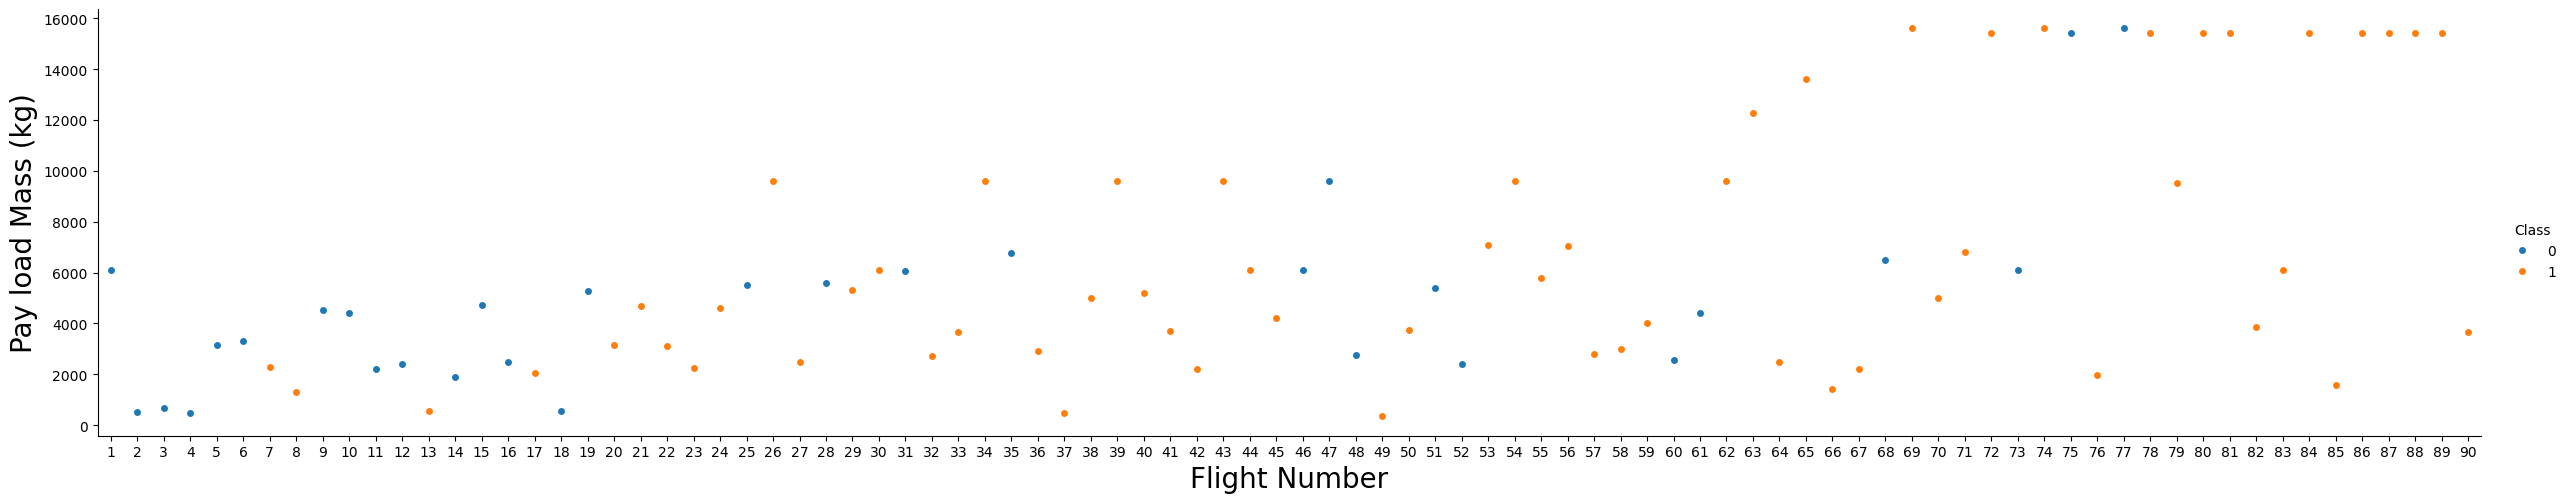

In [6]:
#Plotting Flight Number and payload mass against launch outcome 
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

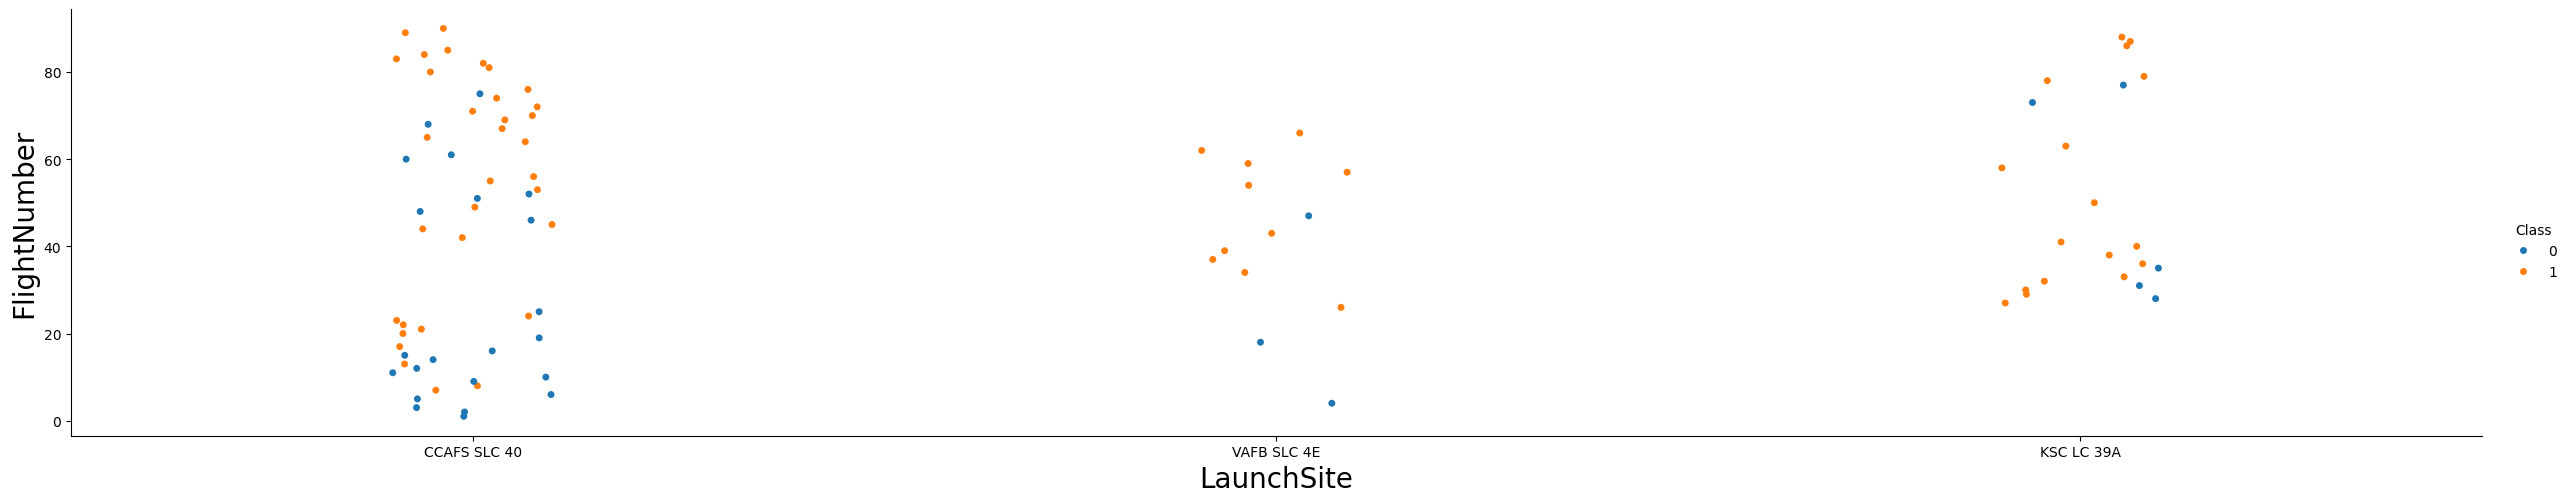

In [9]:
#Plotting Flight Number and Launche site against launch outcome 
sns.catplot(y="FlightNumber", x="LaunchSite", hue="Class", data=df, aspect = 5)
plt.xlabel("LaunchSite",fontsize=20)
plt.ylabel("FlightNumber",fontsize=20)
plt.show()

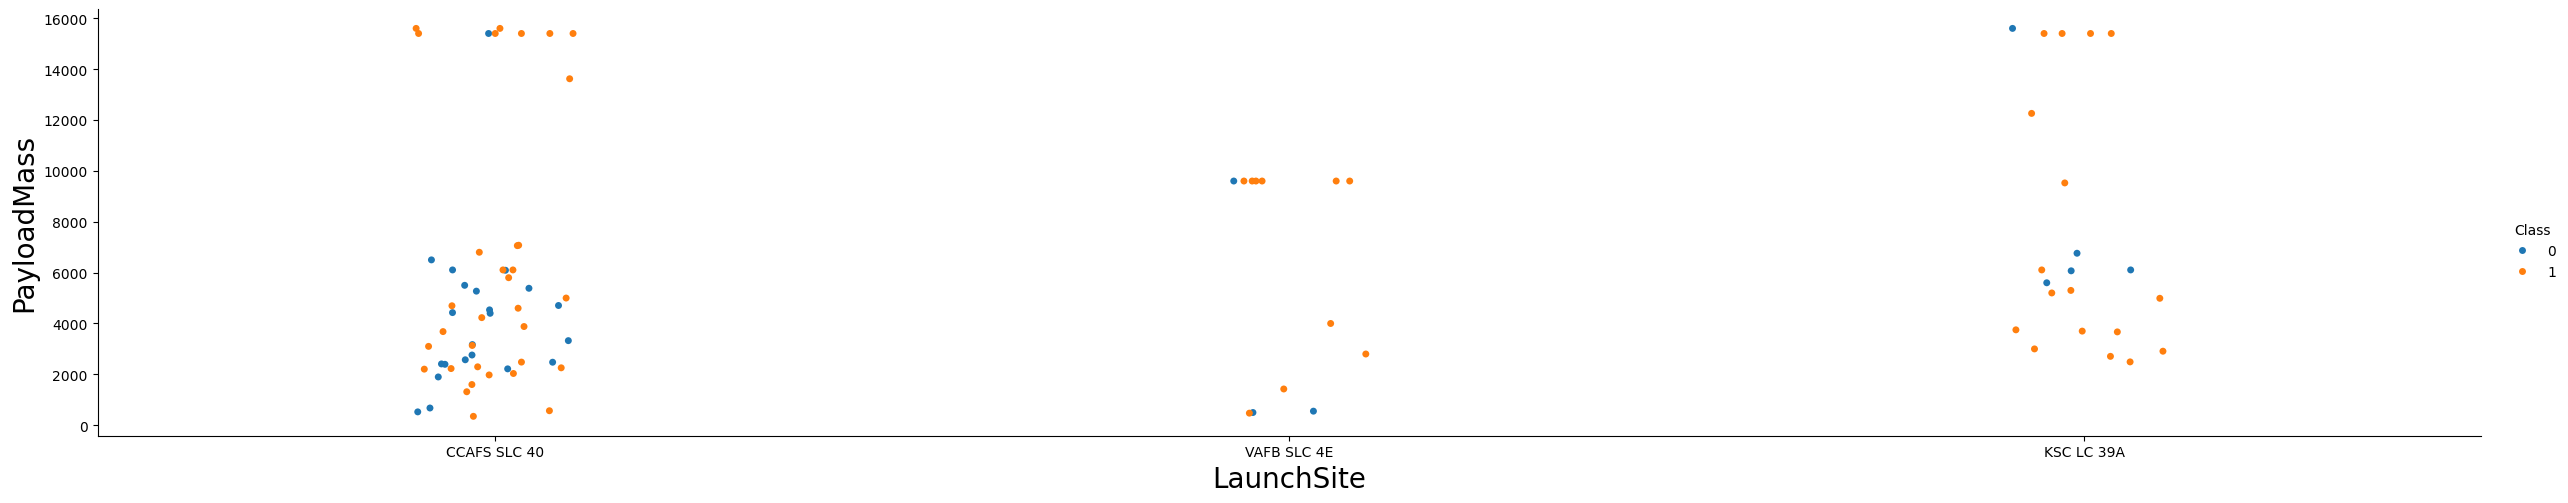

In [10]:
#Plotting PayloadMass and LaunchSites against launch outcome 
sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df, aspect = 5)
plt.xlabel("LaunchSite",fontsize=20)
plt.ylabel("PayloadMass",fontsize=20)
plt.show()

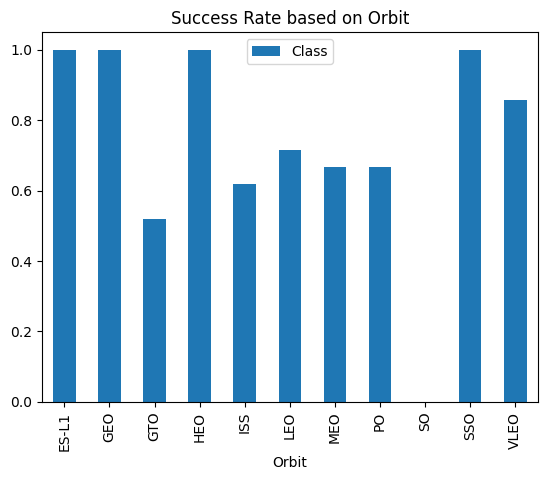

In [21]:
#Plotting Success rate for each orbit type Orbit 
#Grouping based on orbit 
Orbit_success = df[['Orbit','Class']].groupby('Orbit').mean()

#Plotting the Successrate for each Orbit 

Orbit_success.plot(kind = 'bar')
plt.title('Success Rate based on Orbit')
plt.show()

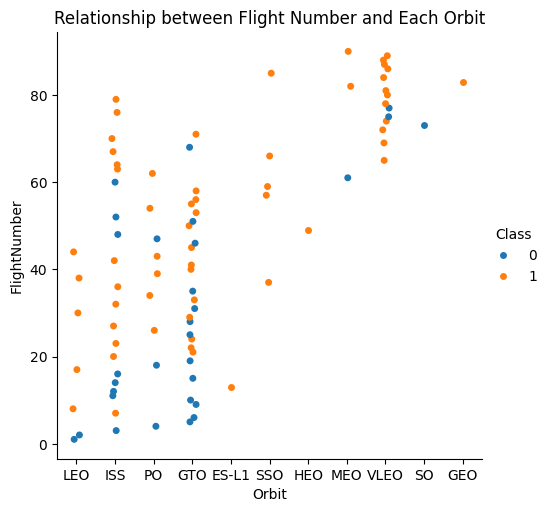

In [28]:
#Using a scatterplot to see if there is a relatioship between Orbit type and Flight Number 
sns.catplot(data = df, x = 'Orbit', y = 'FlightNumber', hue = 'Class')
plt.title('Relationship between Flight Number and Each Orbit')
plt.show()


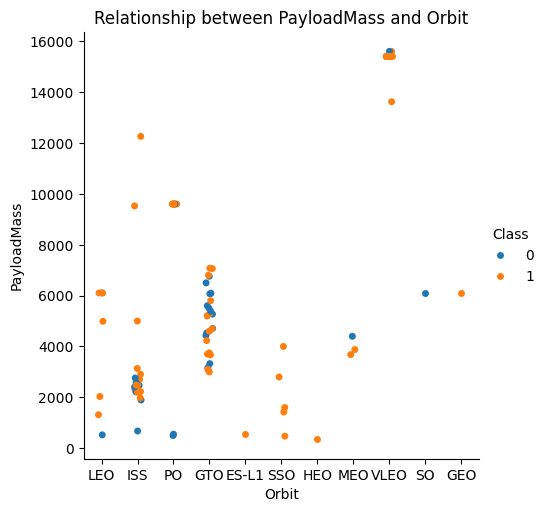

In [30]:
#Visualizing the Relationhip PayloadMass and orbit type 
sns.catplot(data = df , x = 'Orbit', y = 'PayloadMass', hue = 'Class')
plt.title('Relationship between PayloadMass and Orbit')
plt.show()


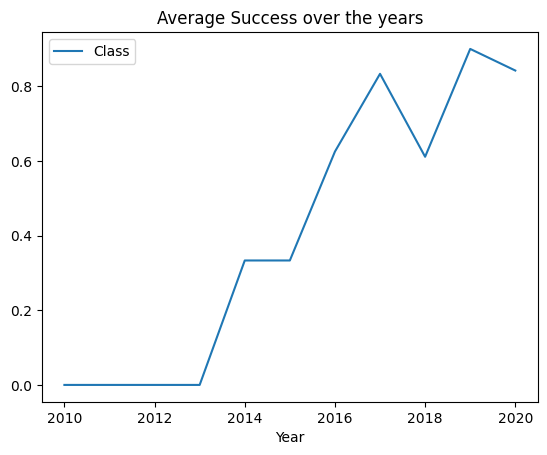

In [40]:
#Visualizing the Launch Success Yearly Trend 
#Extracting the Year from the Date column 
df['Year'] = pd.to_datetime(df.Date).dt.year 
#Grouping by the year to calulate the average success 
Yearly_successRate = df[['Year','Class']].groupby('Year').mean()
#Visualizing Trend with line chart 
Yearly_successRate.plot(kind = 'line')
plt.title('Average Success over the years')
plt.show()

#We can see that the success rate has increases over the years 


In [67]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.dtypes


FlightNumber      int64
PayloadMass     float64
Orbit            object
LaunchSite       object
Flights           int64
GridFins           bool
Reused             bool
Legs               bool
LandingPad       object
Block           float64
ReusedCount       int64
Serial           object
dtype: object

In [70]:
#Cnverting Cateorical variables to Dummy variables 
Features_encoded = pd.get_dummies(features ,columns = ['LaunchSite','Orbit','LandingPad','Serial'])



In [71]:
df['Orbit'].unique()

array(['LEO', 'ISS', 'PO', 'GTO', 'ES-L1', 'SSO', 'HEO', 'MEO', 'VLEO',
       'SO', 'GEO'], dtype=object)

In [95]:
Features_encoded= Features_encoded.astype(int)
Features_encoded[['PayloadMass']] = Features_encoded[['PayloadMass']].astype(float)
len(Features_encoded.columns)


80

In [94]:
Features_encoded.to_csv('Features_encoded.csv', index = False)
